In [5]:
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt

In [6]:
seed = 12
np.random.seed(seed)

path_audio_files = 'music3_audio/'

hop_length = 512 
n_fft = 2048 

In [7]:
audio = f'{path_audio_files}/hiphop/hiphop.00021.wav'
data, sr = librosa.load(audio)

In [8]:
print(sr) # 샘플링 비율
print(data.shape)
print(f'오디오 길이 : {661794/22050}') # 30초 

22050
(661794,)
오디오 길이 : 30.013333333333332


In [9]:
audio_df = pd.read_csv("music30.csv")
audio_df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


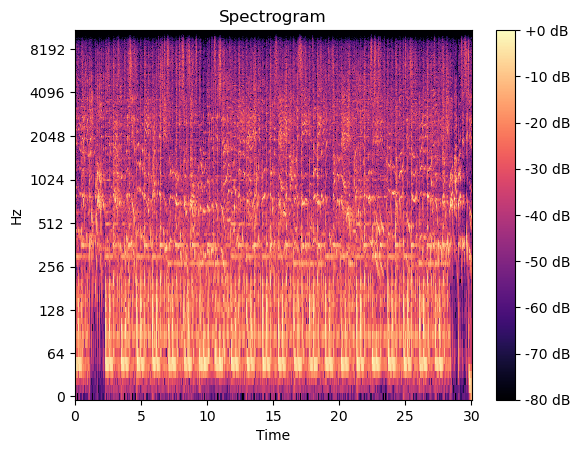

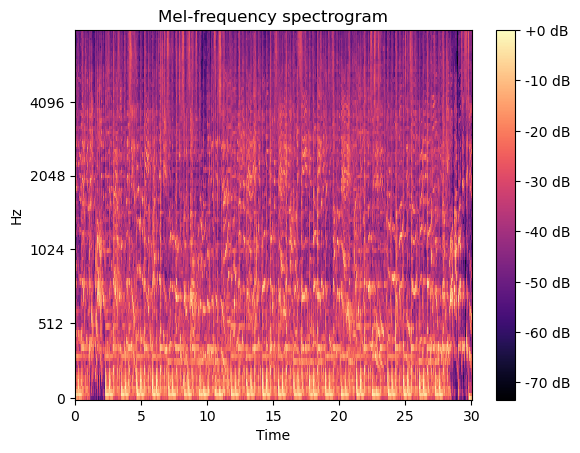

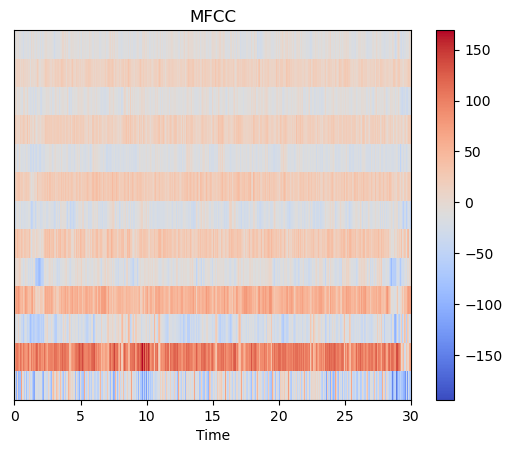

In [10]:
# 단시간 푸리에 변환(STFT)을 수행하고, 절대값을 취한 뒤 로그 스케일로 변환
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
# 로그 스케일로 변환된 데이터를 스펙트로그램으로 시각화
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

# Mel 스펙트로그램 계산
S = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128, fmax=8000)
# Mel 스펙트로그램을 로그 스케일로 변환
log_S = librosa.power_to_db(S, ref=np.max)
# 로그 스케일로 변환된 Mel 스펙트로그램 데이터 시각화
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.show()

# MFCC(Mel Frequency Cepstral Coefficients) 계산
mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)
# MFCC 데이터 시각화
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()